### Consistency between Rating and PD 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [20]:
df=pd.read_csv("Dataset.csv")

In [21]:
df

,PERIOD,CUSTOMER_ID,BRANCH,APPROACH,RATING,PD,LGD,ORIGINAL_EXPOSURE,EAD_AMOUNT,RWA,EXPECTED_LOSS
0,Period1,H136768,Sydney,AIRB,PC2,0.07060,0.316,50000.0,4250.0,4832.7,94.8
1,Period2,H136768,Sydney,AIRB,PC2,0.07060,0.316,50000.0,25000.0,28235.2,557.7
2,Period1,G136767,Sydney,AIRB,PC0+,1.00000,0.316,1000.0,0.0,0.0,0.0
3,Period2,G136767,Sydney,AIRB,PC0+,1.00000,0.316,900.0,0.0,0.0,0.0
4,Period2,C136711,Sydney,AIRB,PC0+,1.00000,0.316,241.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1604416,Period2,V341740,Kuala Lumpur,FIRB,PC4,0.00353,0.450,783.8,783.8,490.3,1.2
1604417,Period2,C341721,Kuala Lumpur,FIRB,PC4,0.00353,0.450,921.6,921.6,493.4,1.5
1604418,Period2,C341721,Kuala Lumpur,FIRB,PC4,0.00353,0.400,1400.7,1400.7,666.6,2.0
1604419,Period2,W341741,Kuala Lumpur,FIRB,PC3,0.01247,0.450,334.6,334.6,284.5,1.9


In [22]:
df["PD"].value_counts()

0.00553    195468
0.00353    178244
0.00247    174292
0.00156    149506
0.00000    147799
0.02500    119565
0.00812    112874
0.00030    104153
0.00104    103047
0.01247     66640
0.00070     54391
0.02307     52849
1.00000     44948
0.00048     35431
0.06396     20286
0.07060     15304
0.00034     12095
0.09863      9239
0.14794      3669
0.20712      2858
0.26926      1763
Name: PD, dtype: int64

In [24]:
df["PD"]=df["PD"]*100

In [25]:
df=df[df["RATING"]!="PCU"]

In [26]:
df=df[df["RATING"]!="PCS"]

In [27]:
df=df[df["RATING"]!="PCN"]
df=df[df["PD"]!=100]

In [28]:
df["RATING"] = df["RATING"].replace(["PC6+"], 1)

In [29]:
df["RATING"] = df["RATING"].replace(["PC6-"], 2)

In [30]:
df["RATING"] = df["RATING"].replace(["PC6"], 3)
df["RATING"] = df["RATING"].replace(["PC5+"], 4)
df["RATING"] = df["RATING"].replace(["PC5-"], 5)
df["RATING"] = df["RATING"].replace(["PC5"], 6)
df["RATING"] = df["RATING"].replace(["PC4+"], 7)
df["RATING"] = df["RATING"].replace(["PC4-"], 8)
df["RATING"] = df["RATING"].replace(["PC4"], 9)
df["RATING"] = df["RATING"].replace(["PC3+"], 10)
df["RATING"] = df["RATING"].replace(["PC3-"], 11)
df["RATING"] = df["RATING"].replace(["PC3"], 12)
df["RATING"] = df["RATING"].replace(["PC2+"], 13)
df["RATING"] = df["RATING"].replace(["PC2-"], 14)
df["RATING"] = df["RATING"].replace(["PC2"], 15)
df["RATING"] = df["RATING"].replace(["PC1+"], 16)
df["RATING"] = df["RATING"].replace(["PC1-"], 17)
df["RATING"] = df["RATING"].replace(["PC1"], 18)
df["RATING"] = df["RATING"].replace(["PC0+"], 19)
df["RATING"] = df["RATING"].replace(["PC0-"], 20)
df["RATING"] = df["RATING"].replace(["PC0"], 21)



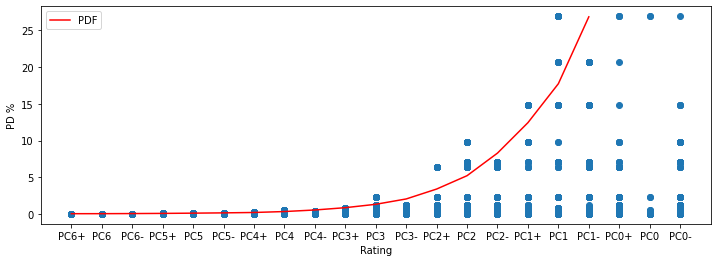

In [58]:
fig, ax = plt.subplots(figsize=(12, 4))
plt.scatter(df["RATING"], df["PD"])
plt.xticks(np.arange(1, 22, 1.0))
labels = ["PC6+","PC6","PC6-","PC5+","PC5","PC5-","PC4+","PC4","PC4-","PC3+","PC3","PC3-","PC2+","PC2","PC2-",
         "PC1+","PC1","PC1-","PC0+","PC0","PC0-",]
ax.set_xticklabels(labels)
PDF = [0.03, 0.034, 0.048, 0.070, 0.104, 0.143, 0.196, 0.323, 0.536, 0.850, 1.310, 2.038, 3.388, 5.208, 8.285, 12.430, 17.735, 26.845]
plt.plot(np.arange(1,19), PDF,"r", label="PDF")
ax.set_ylabel('PD %')
ax.set_xlabel('Rating')
plt.legend()
plt.savefig('pic.png')
#plt.show()
plt.show()
